<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(1_7)%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

In [8]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

In [12]:
res = requests.get(url).content

mashroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

mashroom.columns = ['classes', 'cap_shape', 'cap_ surface','cap _color','bruises', 'odor',
                    'gill_attachment','gill_spacing', 'gill_size','gill_color', 'stalk_shape',
                    'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                    'stalk color above ring', 'stalk color below ring', 'veil type','veil color',
                    'ring _number', 'ring_type', 'spore_print_color', 'population', 'habitat']
#先頭5行を表示
mashroom.head()

,classes,cap_shape,cap_ surface,cap _color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk color above ring,stalk color below ring,veil type,veil color,ring _number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
# データの情報の確認
print(mashroom.info())
# データの形式
print(mashroom.shape)
# データの基本記述統計量の確認
print(mashroom.describe())
# データの欠損値の確認
print(mashroom.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_ surface              8124 non-null   object
 3   cap _color                8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk color above ring  

In [24]:
mushroom_dummy = pd.get_dummies(mashroom[['gill_color',"gill_attachment","odor","cap _color"]]) # one-hot-encodingする。
mushroom_dummy["flg"] = mashroom["classes"].map ( lambda x : 1 if x == "p" else 0)
# mashroom_dummy["flg"] = (mashroom["classes"] == "p").astype(int)
mushroom_dummy.columns

Index(['gill_color_b', 'gill_color_e', 'gill_color_g', 'gill_color_h',
       'gill_color_k', 'gill_color_n', 'gill_color_o', 'gill_color_p',
       'gill_color_r', 'gill_color_u', 'gill_color_w', 'gill_color_y',
       'gill_attachment_a', 'gill_attachment_f', 'odor_a', 'odor_c', 'odor_f',
       'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'cap _color_b', 'cap _color_c', 'cap _color_e', 'cap _color_g',
       'cap _color_n', 'cap _color_p', 'cap _color_r', 'cap _color_u',
       'cap _color_w', 'cap _color_y', 'flg'],
      dtype='object')

In [26]:
mushroom_dummy.groupby(["cap _color_c","flg"])["flg"].count().unstack()

flg,0,1
cap _color_c,,
False,4176,3904
True,32,12


In [27]:
mushroom_dummy.groupby(["gill_color_b","flg"])["flg"].count().unstack()

flg,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [44]:
def calc_entropy(p):
  if p ==0 or 1:
    return 0
  else:
    return -(p * np.log2(p) - (1-p) * np.log2((1-p)))

In [45]:
calc_entropy(0.482)

0

In [46]:
mushroom_dummy.groupby(["cap _color_c","flg"])["flg"].count().unstack()

flg,0,1
cap _color_c,,
False,4176,3904
True,32,12


In [47]:
print( calc_entropy(3904)/(4176 + 3904) *(4176+3904)/8124  + calc_entropy(12/(32+12)) *(32+12)/8124)

0.0


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
x = mushroom_dummy.drop("flg", axis=1)
y = mushroom_dummy["flg"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

model = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9908091252256688
0.9921221073362876


In [56]:
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn import tree

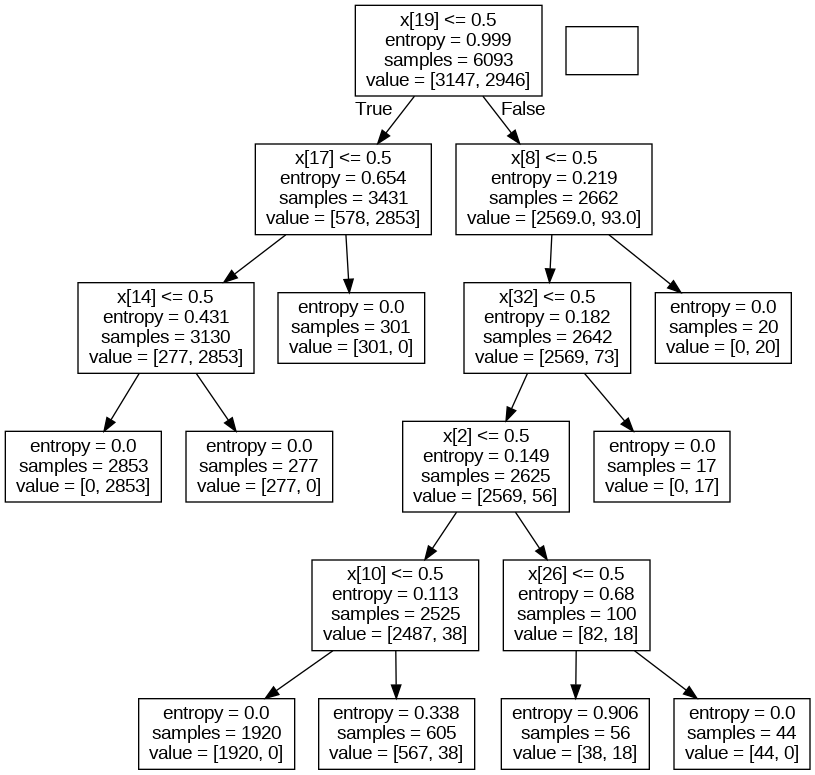

In [57]:
dot_data = StringIO()
tree.export_graphviz(model,out_file = dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())